In [ ]:
# !pip install wandb
# import wandb
# %reload_ext tensorboard
# !rm -rf ./logs/ 
# wandb.login()

In [ ]:
# wandb.init(project="MLA project")

wandb: Currently logged in as: harshp77 (rtx). Use `wandb login --relogin` to force relogin


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , Activation , Flatten , Conv2D , MaxPooling2D , ZeroPadding2D , BatchNormalization 
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adadelta , Adam 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
import seaborn as sns
import tensorboard
import datetime
import cv2
import numpy as np
import pandas as pd
import os
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt

In [ ]:
!unzip /content/drive/MyDrive/MLA/bin_val_ae.zip -d /content/drive/MyDrive/MLA

Archive:  /content/drive/MyDrive/MLA/bin_val_ae.zip
   creating: /content/drive/MyDrive/MLA/bin_val_ae/test/
   creating: /content/drive/MyDrive/MLA/bin_val_ae/test/a/
  inflating: /content/drive/MyDrive/MLA/bin_val_ae/test/a/S01 attempt 39.jpeg  
  inflating: /content/drive/MyDrive/MLA/bin_val_ae/test/a/S01 attempt 40.jpeg  
  inflating: /content/drive/MyDrive/MLA/bin_val_ae/test/a/S01 attempt 41.jpeg  
  inflating: /content/drive/MyDrive/MLA/bin_val_ae/test/a/S01 attempt 42.jpeg  
  inflating: /content/drive/MyDrive/MLA/bin_val_ae/test/a/S01 attempt 43.jpeg  
  inflating: /content/drive/MyDrive/MLA/bin_val_ae/test/a/S01 attempt 44.jpeg  
  inflating: /content/drive/MyDrive/MLA/bin_val_ae/test/a/S01 attempt 45.jpeg  
  inflating: /content/drive/MyDrive/MLA/bin_val_ae/test/a/S01 attempt 46.jpeg  
  inflating: /content/drive/MyDrive/MLA/bin_val_ae/test/a/S01 attempt 47.jpeg  
  inflating: /content/drive/MyDrive/MLA/bin_val_ae/test/a/S01 attempt 48.jpeg  
  inflating: /content/drive/MyDr

In [ ]:
train_path="/content/drive/MyDrive/MLA/bin_val_ae/train"
test_path="/content/drive/MyDrive/MLA/bin_val_ae/test"
val_path="/content/drive/MyDrive/MLA/bin_val_ae/validate"



x_train=[]
for folder in os.listdir(train_path):
    sub_path=train_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(227, 227))
        x_train.append(img_arr)
x_test=[]
for folder in os.listdir(test_path):
    sub_path=test_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(227, 227))
        x_test.append(img_arr)
x_val=[]
for folder in os.listdir(val_path):
    sub_path=val_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(227, 227))
        x_val.append(img_arr)





train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)


train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)



training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (227, 227),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (227, 227),
                                            batch_size = 32,
                                            class_mode = 'binary')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (227, 227),
                                            batch_size = 32,
                                            class_mode = 'binary')
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

Found 88 images belonging to 2 classes.
Found 21 images belonging to 2 classes.
Found 11 images belonging to 2 classes.


In [ ]:
from tensorflow import keras
import tensorflow as tf
model_alex_Net = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='softmax')
])

from tensorflow.keras import optimizers
model_alex_Net.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])
model_alex_Net.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization_30 (Bat  (None, 55, 55, 96)       384       
 chNormalization)                                                
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 27, 27, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_31 (Bat  (None, 27, 27, 256)      1024      
 chNormalization)                                                
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)


history = model_alex_Net.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=100,
  batch_size=32,shuffle=True)


Epoch 1/100
3/3 [==============================] - 13s 308ms/step - loss: 17.3881 - accuracy: 0.5568 - val_loss: 0.6902 - val_accuracy: 0.4545
Epoch 2/100
3/3 [==============================] - 0s 54ms/step - loss: 7.0311 - accuracy: 0.5568 - val_loss: 0.7000 - val_accuracy: 0.4545
Epoch 3/100
3/3 [==============================] - 0s 57ms/step - loss: 4.7765 - accuracy: 0.5568 - val_loss: 0.6959 - val_accuracy: 0.4545
Epoch 4/100
3/3 [==============================] - 0s 55ms/step - loss: 4.1242 - accuracy: 0.5568 - val_loss: 0.7000 - val_accuracy: 0.4545
Epoch 5/100
3/3 [==============================] - 0s 57ms/step - loss: 1.6525 - accuracy: 0.5568 - val_loss: 0.6974 - val_accuracy: 0.4545
Epoch 6/100
3/3 [==============================] - 0s 53ms/step - loss: 1.8888 - accuracy: 0.5568 - val_loss: 0.7045 - val_accuracy: 0.4545
Epoch 7/100
3/3 [==============================] - 0s 57ms/step - loss: 1.5227 - accuracy: 0.5568 - val_loss: 0.7029 - val_accuracy: 0.4545
Epoch 8/100
3/3 [

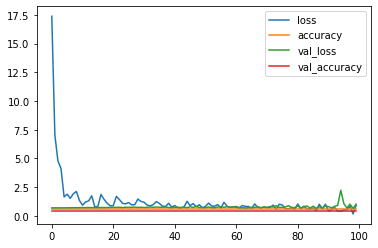

In [ ]:
loss = pd.DataFrame(model_alex_Net.history.history)
loss.plot()